In [ ]:
##### Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import regularizers
from keras.utils import to_categorical

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Preprocessing + Data Exploration

Loading Data + Data Exploration

In [ ]:
##### Load Data
# https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
credit = pd.read_csv("creditcard_2023.csv")

# Check for missing values and drop them
# print(credit.isnull().sum())
credit = credit.dropna()
# print(credit.isnull().sum())

# Quick Exploration
print(credit.shape)
credit.head()


(568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 394'. Pick better value with 'binwidth'.


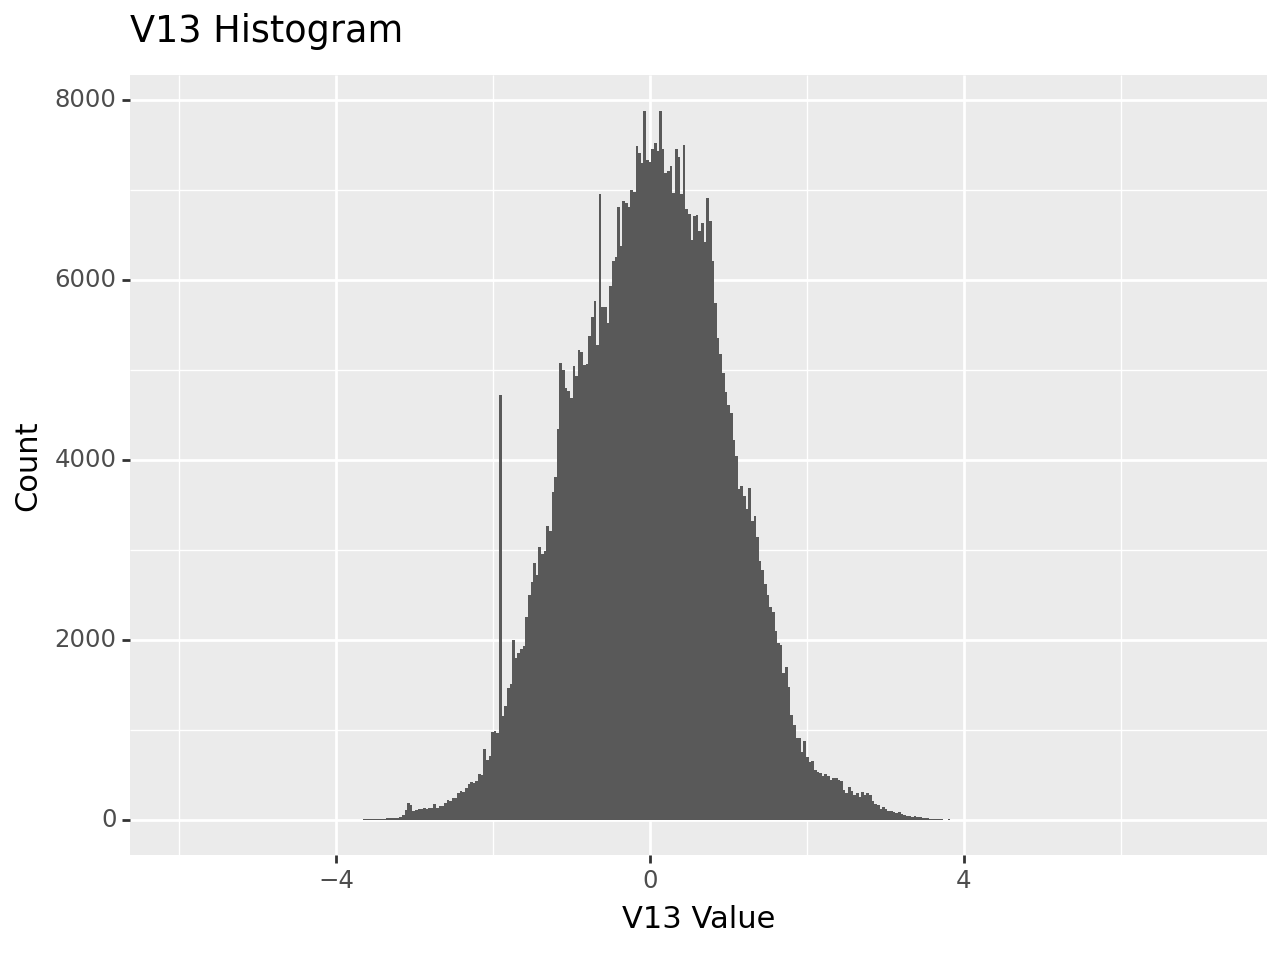

<Figure Size: (640 x 480)>

In [ ]:
##### Further Data Exploration
(ggplot(credit, aes(x = "V13")) + geom_histogram() +
 ggtitle("V13 Histogram") +
 labs(x = "V13 Value", y = "Count"))


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 170'. Pick better value with 'binwidth'.


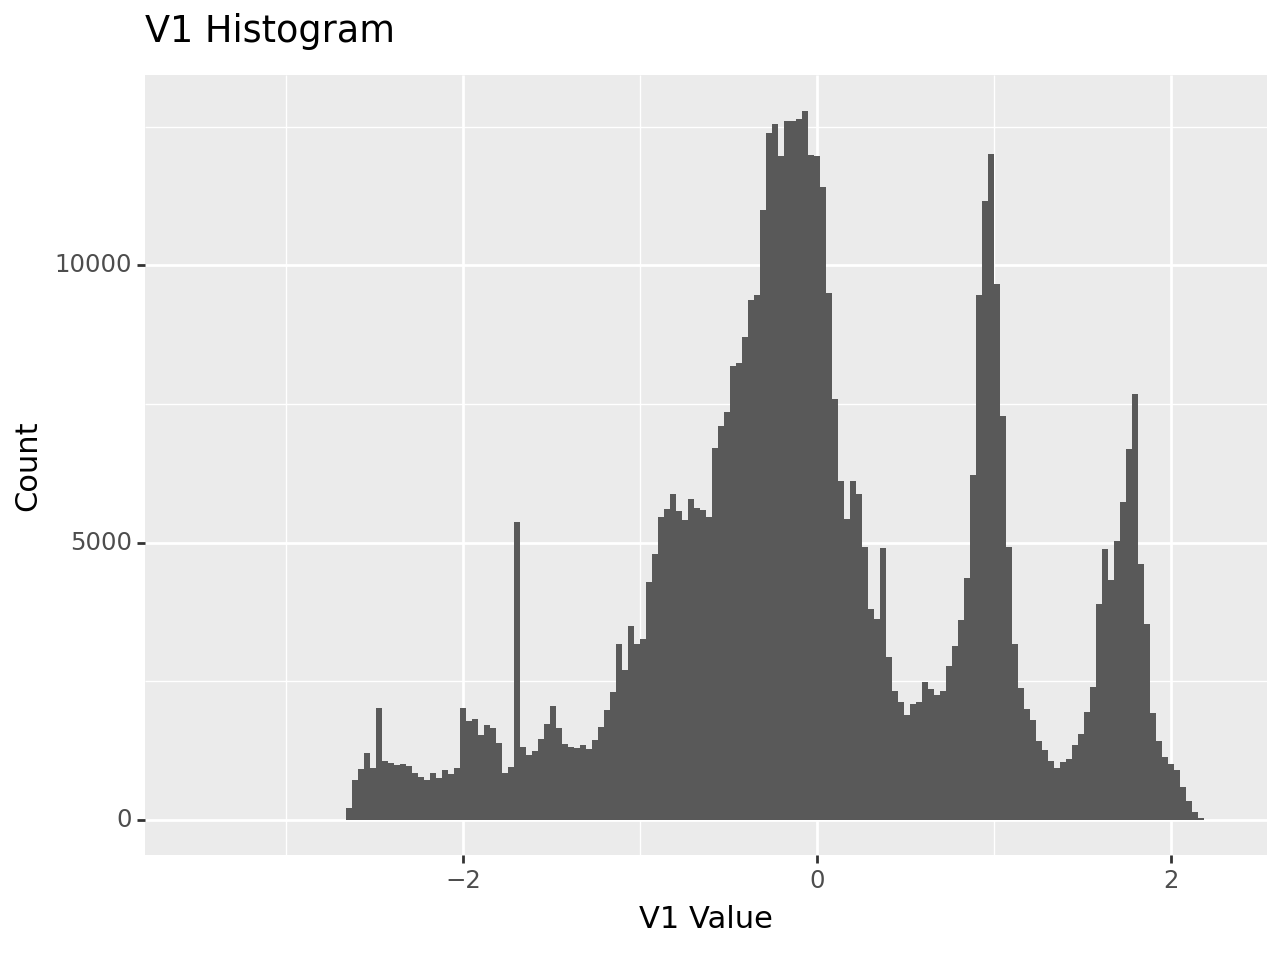

<Figure Size: (640 x 480)>

In [ ]:
##### Further Data Exploration
(ggplot(credit, aes(x = "V1")) + geom_histogram() +
 ggtitle("V1 Histogram") +
 labs(x = "V1 Value", y = "Count"))


In [ ]:
##### Check for Class Imbalance
not_fraud = credit["Class"] == 0
fraud = credit["Class"] == 1

print("Number of Non-Fraudulent Cases:", credit["Class"].loc[not_fraud].count())
print("Number of Fraudulent Cases:", credit["Class"].loc[fraud].count())


Number of Non-Fraudulent Cases: 284315
Number of Fraudulent Cases: 284315


In [ ]:
##### Check if Values are Normally Distributed
credit.describe()


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


Initial Preprocessing

In [ ]:
##### Preprocess and Split Data
predictors = list(credit.columns)
predictors.remove("id")
predictors.remove("Class")

X = credit[predictors]
y = credit["Class"]

# 80/20 Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Z-Score
z = StandardScaler()
z.fit(X_train)

X_train[predictors] = z.transform(X_train)
X_test[predictors] = z.transform(X_test)

# Split Train to Create Validation Data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25)


Logistic Regression Model for Comparasion

In [ ]:
##### Basic Logistic Regression Model for Comparasion
myLogit = LogisticRegression()
myLogit.fit(X_train, y_train)

# Predictions
predictedVals = myLogit.predict(X_test)
predictedProbs = myLogit.predict_proba(X_test)


In [ ]:
##### Performance Metrics
print("Test Accuracy:", accuracy_score(y_test, predictedVals))


Test Accuracy: 0.9645903311467914


In [ ]:
##### Convert Data to Tensors for Feed Foward Neural Network
X_train = tf.convert_to_tensor(X_train)
X_test = tf.convert_to_tensor(X_test)
X_val = tf.convert_to_tensor(X_val)

y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)
y_val = tf.convert_to_tensor(y_val)


#First Feed Foward Neural Network(FFNN)

In [ ]:
##### First Unoptimized Binary Model
first_model = keras.Sequential([
    layers.Dense(16, activation = "relu"),
    layers.Dense(16, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
first_model.compile(optimizer = "rmsprop",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Fit Model
history = first_model.fit(X_train, y_train,
                           epochs = 20,
                           batch_size = 256,
                           validation_data = (X_val, y_val))


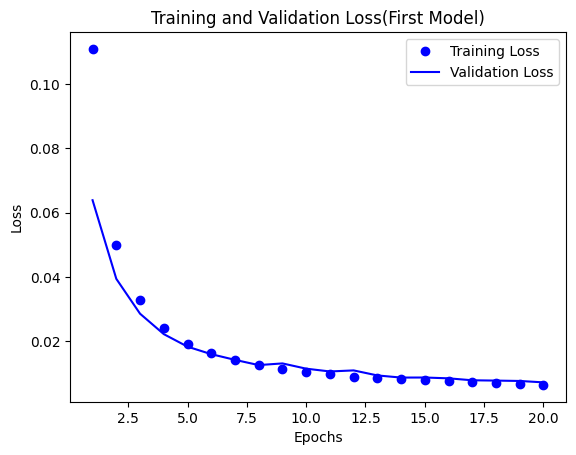

In [ ]:
##### Plot Training and Validation Loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss(First Model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


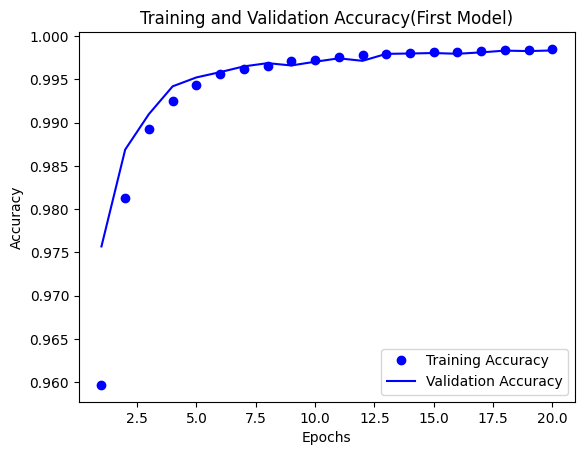

In [ ]:
##### Plot Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training Accuracy")
plt.plot(epochs, val_acc, "b", label = "Validation Accuracy")
plt.title("Training and Validation Accuracy(First Model)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
##### Performance Metrics
results = first_model.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.009
Test Accuracy: 0.9979


# Second FFNN

In [ ]:
##### Second Binary Model
second_model = keras.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
second_model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Train Model
history = second_model.fit(X_train, y_train,
                           epochs = 25,
                           batch_size = 256,
                           validation_data = (X_val, y_val))


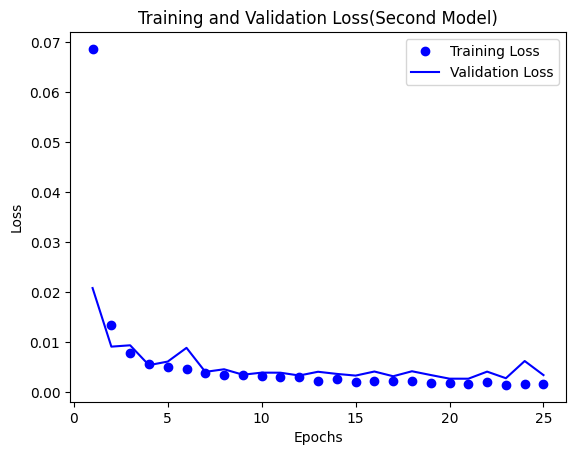

In [ ]:
##### Plot Training and Validation Loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss(Second Model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


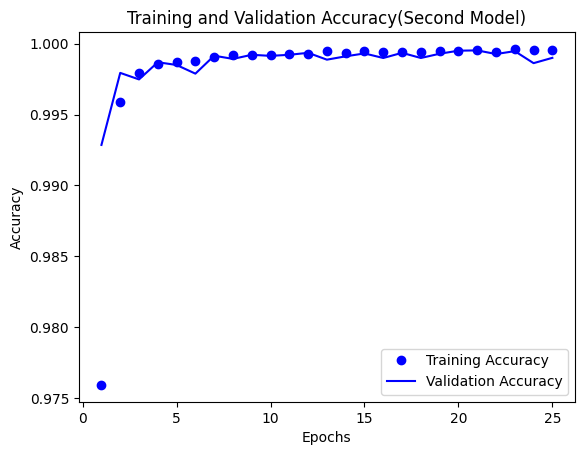

In [ ]:
##### Plot Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy(Second Model)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
##### Performance Metrics
results = second_model.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.003
Test Accuracy: 0.9992


# Third FFNN

In [ ]:
##### Third Binary Model
third_model = keras.Sequential([
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(256, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
third_model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Train Model
history = third_model.fit(X_train, y_train,
                           epochs = 20,
                           batch_size = 512,
                           validation_data = (X_val, y_val))


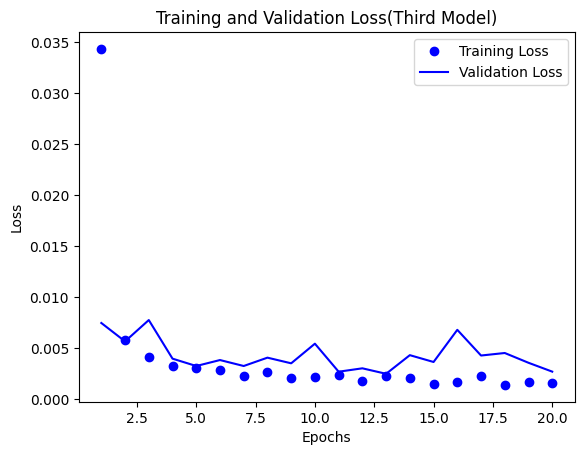

In [ ]:
##### Plot Training and Validation Loss
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label = "Training Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.title("Training and Validation Loss(Third Model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


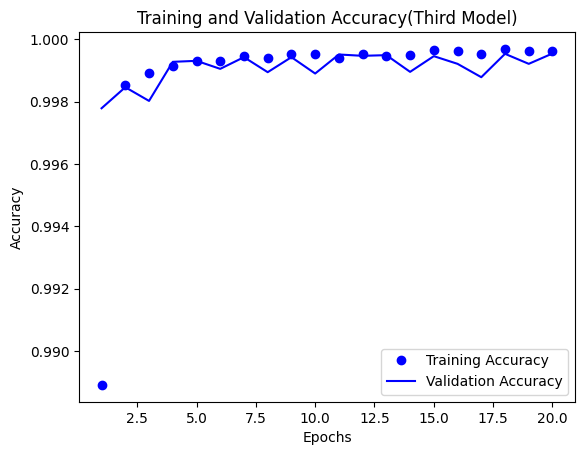

In [ ]:
##### Plot Training and Validation Accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training and Validation Accuracy(Third Model)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
##### Performance Metrics
results = third_model.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.002
Test Accuracy: 0.9995


# Final Model and Other Tests

In [ ]:
##### Final Binary Model
final_model = keras.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
final_model.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Train Model
final_model.fit(X_train, y_train, epochs = 20,
                batch_size = 512,
                validation_data = (X_val, y_val))


In [ ]:
##### Performance Metrics
results = final_model.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.002
Test Accuracy: 0.9995


In [ ]:
##### Prediction Speed Test
final_model.predict(X_test)


3554/3554 [==============================] - 5s 2ms/step


array([[9.613240e-38],
       [9.997634e-01],
       [7.848824e-15],
       ...,
       [9.993615e-01],
       [9.999821e-01],
       [1.814332e-32]], dtype=float32)

Final Model with Regularization Applied

In [ ]:
##### Final Binary Model with Regularization Applied(L1 + Dropout)
final_model_reg = keras.Sequential([
    layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.L1(0.01)),
    layers.Dropout(0.25),
    layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.L1(0.01)),
    layers.Dropout(0.25),
    layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.L1(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
final_model_reg.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Train Model
final_model_reg.fit(X_train, y_train, epochs = 20,
                batch_size = 512,
                validation_data = (X_val, y_val))


In [ ]:
##### Performance Metrics
results = final_model_reg.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.215
Test Accuracy: 0.9605


In [ ]:
##### Prediction Speed Test
final_model_reg.predict(X_test)


3554/3554 [==============================] - 9s 3ms/step


array([[0.00951509],
       [0.9974761 ],
       [0.05988359],
       ...,
       [0.9964382 ],
       [0.99998313],
       [0.00312823]], dtype=float32)

In [ ]:
##### Final Binary Model with Regularization Applied(L2 + Dropout)
final_model_reg2 = keras.Sequential([
    layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.L2(0.01)),
    layers.Dropout(0.25),
    layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.L2(0.01)),
    layers.Dropout(0.25),
    layers.Dense(32, activation = "relu", kernel_regularizer = regularizers.L2(0.01)),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
final_model_reg2.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Train Model
final_model_reg2.fit(X_train, y_train, epochs = 20,
                batch_size = 512,
                validation_data = (X_val, y_val))


In [ ]:
##### Performance Metrics
results = final_model_reg2.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.079
Test Accuracy: 0.9864


In [ ]:
##### Prediction Speed Test
final_model_reg2.predict(X_test)


3554/3554 [==============================] - 8s 2ms/step


array([[7.0215302e-04],
       [9.9988085e-01],
       [1.5818132e-02],
       ...,
       [9.9987042e-01],
       [9.9999970e-01],
       [2.7245904e-05]], dtype=float32)

In [ ]:
##### Final Binary Model with Regularization Applied(Dropout Only)
final_model_reg3 = keras.Sequential([
    layers.Dense(32, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(32, activation = "relu"),
    layers.Dropout(0.25),
    layers.Dense(32, activation = "relu"),
    layers.Dense(1, activation = "sigmoid")
])

# Compile Model
final_model_reg3.compile(optimizer = "adam",
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

# Train Model
final_model_reg3.fit(X_train, y_train, epochs = 20,
                batch_size = 512,
                validation_data = (X_val, y_val))


In [ ]:
##### Performance Metrics
results = final_model_reg3.evaluate(X_test, y_test, verbose = 0)

# Print Loss and Accuracy
print("Test Loss: %.3f" % results[0])
print("Test Accuracy: %.4f" % results[1])


Test Loss: 0.005
Test Accuracy: 0.9991


In [ ]:
##### Prediction Speed Test
final_model_reg3.predict(X_test)


3554/3554 [==============================] - 7s 2ms/step


array([[3.6131143e-20],
       [9.9995846e-01],
       [7.0411126e-09],
       ...,
       [9.9951363e-01],
       [9.9998045e-01],
       [0.0000000e+00]], dtype=float32)